In [20]:
# import lib
# import dataset
# implement UCB
# visualize the result

In [21]:
# import lib

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
##  import the dataset
dataset=pd.read_csv("Ads_CTR_Optimisation.csv")

In [24]:
dataset

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


In [25]:
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [26]:
# implement UCB

In [40]:
import math
N=10000      ####  N= number of rounds pr number of rows
d=10       ####  number of columns
ads_selected=[]
numbers_of_selections=[0]*d
sum_of_rewards=[0]*d
total_reward=0


for n in range(0,N):
      ad=0
      max_upper_bound=0
      for i in range(0,d):
            
            if(numbers_of_selections[i]>0):
                     average_reward=sum_of_rewards[i]/numbers_of_selections[i]
                     delta_i=math.sqrt(3/2 * math.log(n+1)/numbers_of_selections[i])
                     upper_bound=average_reward+delta_i
            else:
                upper_bound=1e400
            if upper_bound>max_upper_bound:
                max_upper_bound=upper_bound
                ad=i
            ads_selected.append(ad)
            numbers_of_selections[ad]+=1
            reward=dataset.values[i,ad]
            sum_of_rewards[ad]+=reward
            total_reward+=reward

Text(0, 0.5, 'No of times each ad was selected')

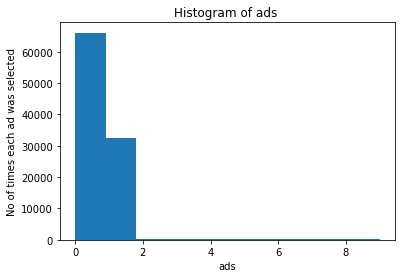

In [41]:
###  Visualize the result
plt.hist(ads_selected)
plt.title("Histogram of ads ")
plt.xlabel("ads")
plt.ylabel("No of times each ad was selected")